In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def relu(x):
    return x * (x > 0)

def lasso(x, reg=0.1):
    if x > reg:
        return x - reg
    elif x < -reg:
        return x + reg
    else:
        return 0

def betalasso(x, reg=0.1, beta=50):
    if x > beta*reg:
        return x - reg
    elif x < -beta*reg:
        return x + reg
    else:
        return 0

def betalasso2(x, reg=0.1, beta=50):
    xnew = x - reg * np.sign(x)
    xnew *= (np.abs(x) >= (beta * reg))
    return xnew

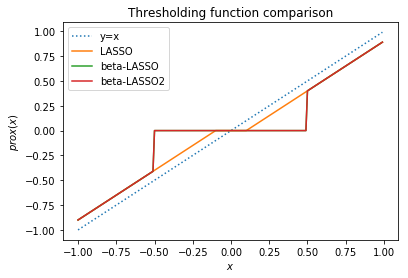

In [3]:
reg = 0.1
beta = 5
n = 1
eps = reg / 10.0
xs = np.arange(-n, n, eps)
ys_lasso = np.array([lasso(x, reg) for x in xs])
ys_betalasso = np.array([betalasso(x, reg, beta) for x in xs])
ys_betalasso2 = np.array([betalasso2(x, reg, beta) for x in xs])

plt.plot(xs, xs, label='y=x', linestyle=':')
plt.plot(xs, ys_lasso, label='LASSO')
plt.plot(xs, ys_betalasso, label='beta-LASSO')
plt.plot(xs, ys_betalasso2, label='beta-LASSO2')

plt.title('Thresholding function comparison')
plt.xlabel('$x$')
plt.ylabel('$prox(x)$')
plt.legend()
plt.show()

In [4]:
import torch
import sys
sys.path.append('..')
from models import S_FC as Net

from mpl_toolkits.axes_grid1 import ImageGrid

In [12]:
PATH = '../models/81_model/__reg12e-05_reg5e-06_dropoutFalse__.pt'
model = Net(dropout=False)
model.load_state_dict(torch.load(PATH))
model.eval()
w = model.layer1.weight.detach().cpu()

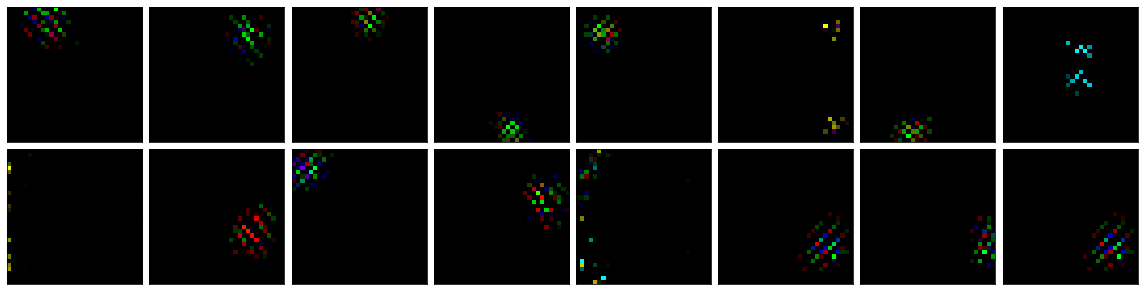

In [17]:
def get_images(w, n=1, nz=30):
    select = torch.randint(0, w.shape[0], size=(n,))
    #select = torch.arange(n)
    w_im = w[select].unflatten(1, (3, 32, 32))
    w_im = []
    while len(w_im) < n:
        select = torch.randint(0, w.shape[0], size=(1,))
        wt = w[select].unflatten(1, (3, 32, 32))
        if torch.count_nonzero(wt) >= nz:
            w_im.append(wt[0])
    return w_im

def fn(x):
    xt = (np.abs(x) / np.max(np.abs(x)))
    return xt

n = 16
im = get_images(w, n=n)
xs = [fn(im[i].transpose(0,2).numpy()) for i in range(n)]


fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, xs):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()
plt.savefig('filters.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [9]:
PATH = '../models/__SGD__momentum0.9__wd0.0_dropoutFalse__.pt'
model = Net(dropout=False)
model.load_state_dict(torch.load(PATH))
model.eval()
w = model.layer1.weight.detach().cpu()

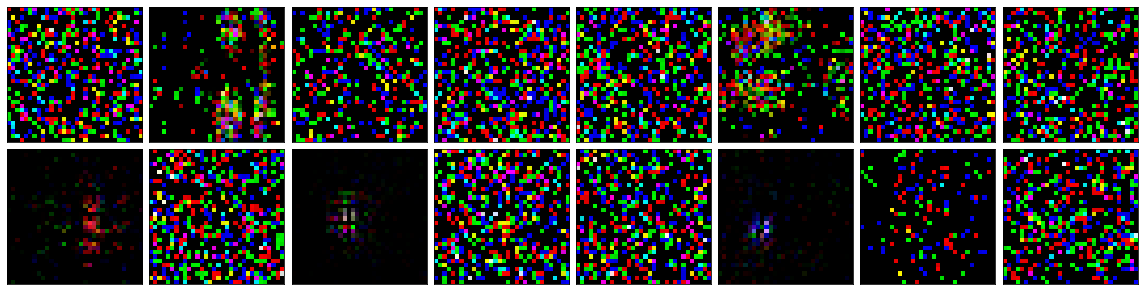

In [10]:
def get_images(w, n=1, nz=30):
    select = torch.randint(0, w.shape[0], size=(n,))
    #select = torch.arange(n)
    w_im = w[select].unflatten(1, (3, 32, 32))
    w_im = []
    while len(w_im) < n:
        select = torch.randint(0, w.shape[0], size=(1,))
        wt = w[select].unflatten(1, (3, 32, 32))
        if torch.count_nonzero(wt) >= nz:
            w_im.append(wt[0])
    return w_im

def fn(x):
    xt = (np.abs(x) / np.max(np.abs(x)))
    return xt

n = 16
im = get_images(w, n=n)
xs = [fn(im[i].transpose(0,2).numpy()) for i in range(n)]


fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, xs):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()
plt.savefig('filters_lth.png', bbox_inches='tight', pad_inches=0)
plt.show()